## Bike-Sharing-Assignment
### Problem Statetment
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below
 their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict
 the actual value of the prospective properties and decide whether to invest in them or not.

#### The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import sys
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read Data

In [2]:
train_df = pd.read_csv('train.csv')

# Data understanding

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

# Removing columns having null values more than 85%

In [7]:
all_null_columns=round(train_df.isnull().sum()/len(train_df),2)
null_columns=all_null_columns[all_null_columns.values>0.15]
null_columns

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [8]:
train_df = train_df.drop(list(null_columns.index),axis='columns')

# lets normalize all the year related values

In [9]:
# subtract all columns with there max values should do the job

In [10]:
train_df['YearBuilt_Updated'] = train_df.YearBuilt.max()-train_df.YearBuilt
train_df['YearRemodAdd_Updated'] = train_df.YearRemodAdd.max()-train_df.YearRemodAdd
train_df['GarageYrBlt_Updated'] = train_df.GarageYrBlt.max()-train_df.GarageYrBlt
train_df['YrSold_Updated'] = train_df.YrSold.max()-train_df.YrSold

In [11]:
# remove the columns which are not needed now
train_df = train_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

# Fill the missing values based on our understanding from data dict

In [12]:
all_null_columns=round(train_df.isnull().sum()/len(train_df.index),2)
# below are the columns which contains missing values 
all_null_columns[all_null_columns.values>0.00]

MasVnrType             0.01
MasVnrArea             0.01
BsmtQual               0.03
BsmtCond               0.03
BsmtExposure           0.03
BsmtFinType1           0.03
BsmtFinType2           0.03
GarageType             0.06
GarageFinish           0.06
GarageQual             0.06
GarageCond             0.06
GarageYrBlt_Updated    0.06
dtype: float64

In [13]:
train_df.MasVnrType.fillna('None',inplace=True)
train_df.MasVnrArea.fillna(train_df.MasVnrArea.mean(),inplace=True)
train_df.BsmtQual.fillna('TA',inplace=True)
train_df.BsmtCond.fillna('TA',inplace=True)
train_df.BsmtExposure.fillna('No',inplace=True)
train_df.BsmtFinType1.fillna('Unf',inplace=True)
train_df.BsmtFinType2.fillna('Unf',inplace=True)
train_df.GarageType.fillna('Attchd',inplace=True)
train_df.GarageFinish.fillna('Unf',inplace=True)
train_df.GarageQual.fillna('TA',inplace=True)
train_df.GarageCond.fillna('TA',inplace=True)
train_df.GarageYrBlt_Updated.fillna(-1,inplace=True) #for this -1 represents no garage

# EDA

In [14]:
# Check number of numerical and categorical features remaning
num = []
cat = []
for i in train_df.columns:
    if train_df[i].dtypes != 'O':
        num.append(i)
    else:
        cat.append(i)
print('Numerical features - ', len(num))
print('Categorical features - ', len(cat))

Numerical features -  37
Categorical features -  38


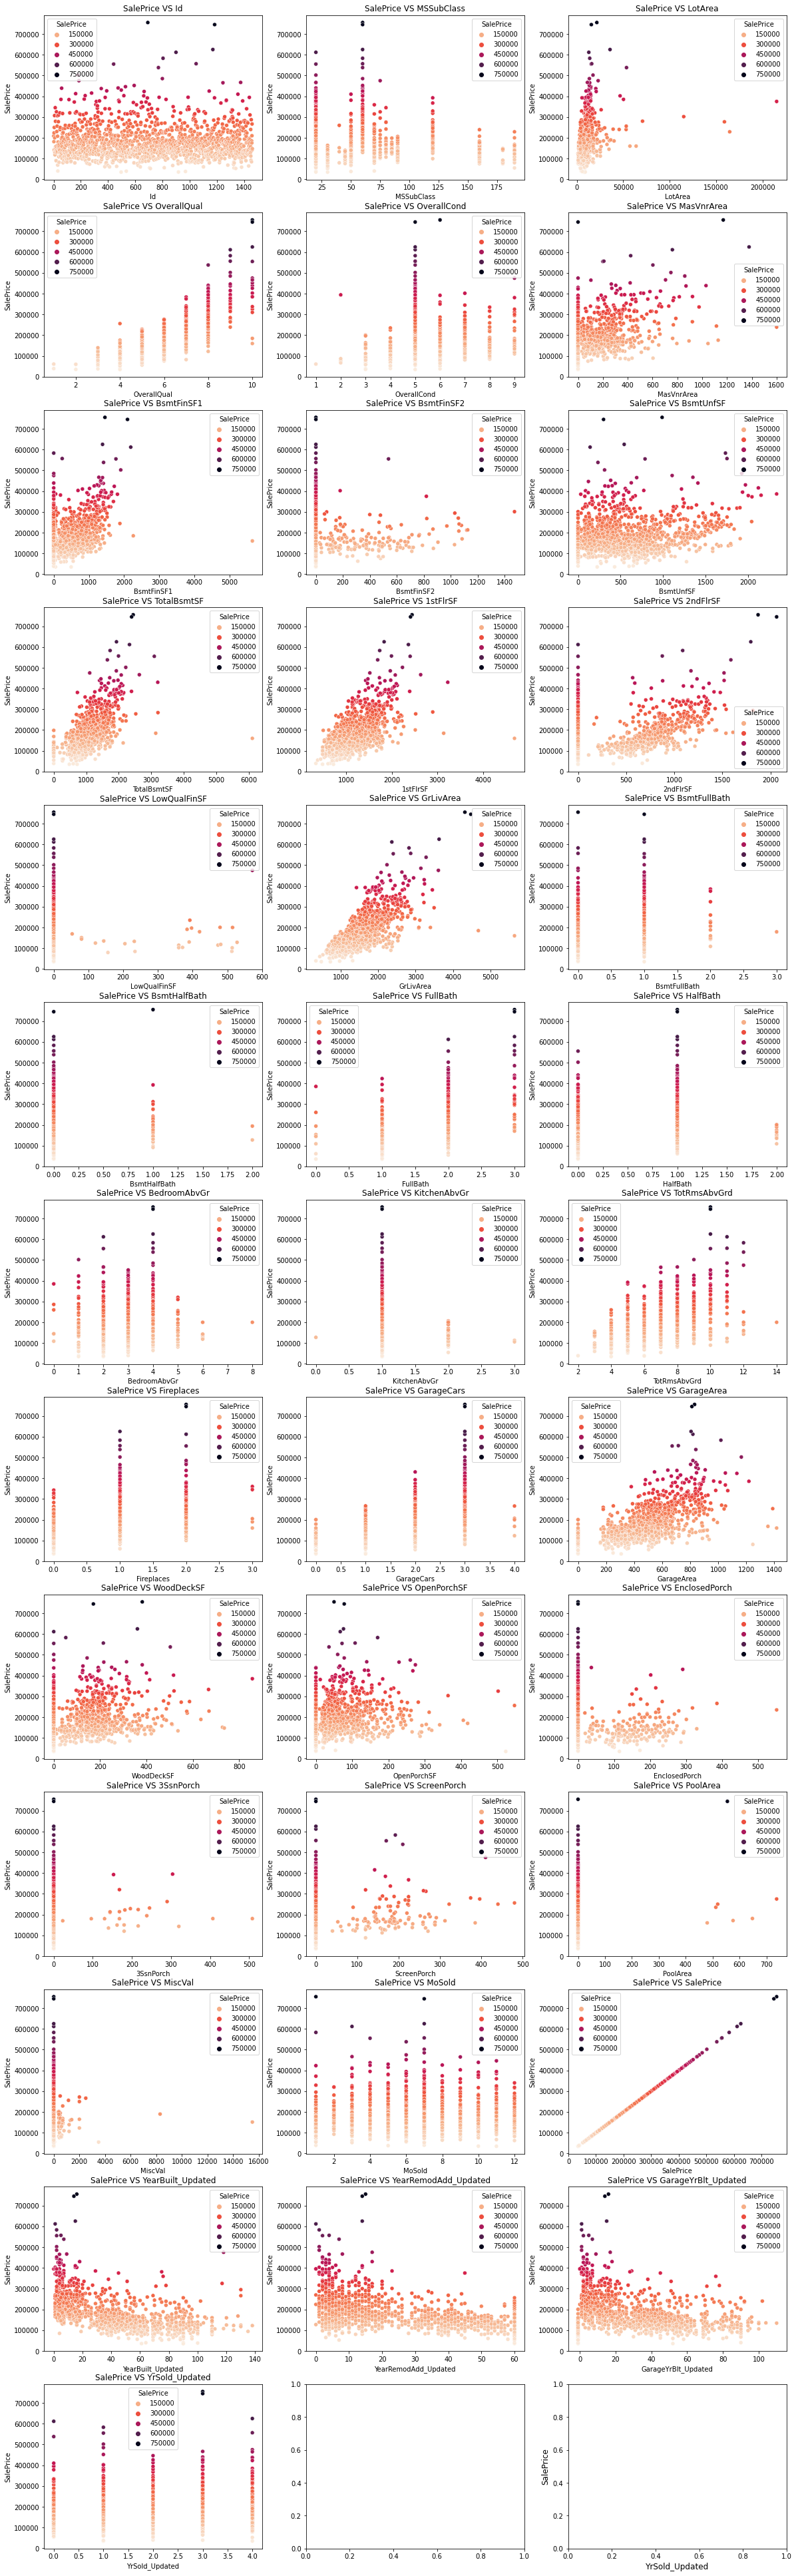

In [15]:
# Plot numerical features with the target variable
num_df = train_df[num]
fig,axs= plt.subplots(13,3,figsize=(20,70))
for i,ax in zip(num_df.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=num_df,ax=ax,palette='rocket_r')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

In [16]:
#Observations from the above plot:-

## Id's are not needed as excepted
## GRLiving Area has a direct corelation with the price of the property.
## Total basement area, 1st floor are linearly related with each other and are directly proportional to the price.
## Pool Area, Month sold has no effect on the price.

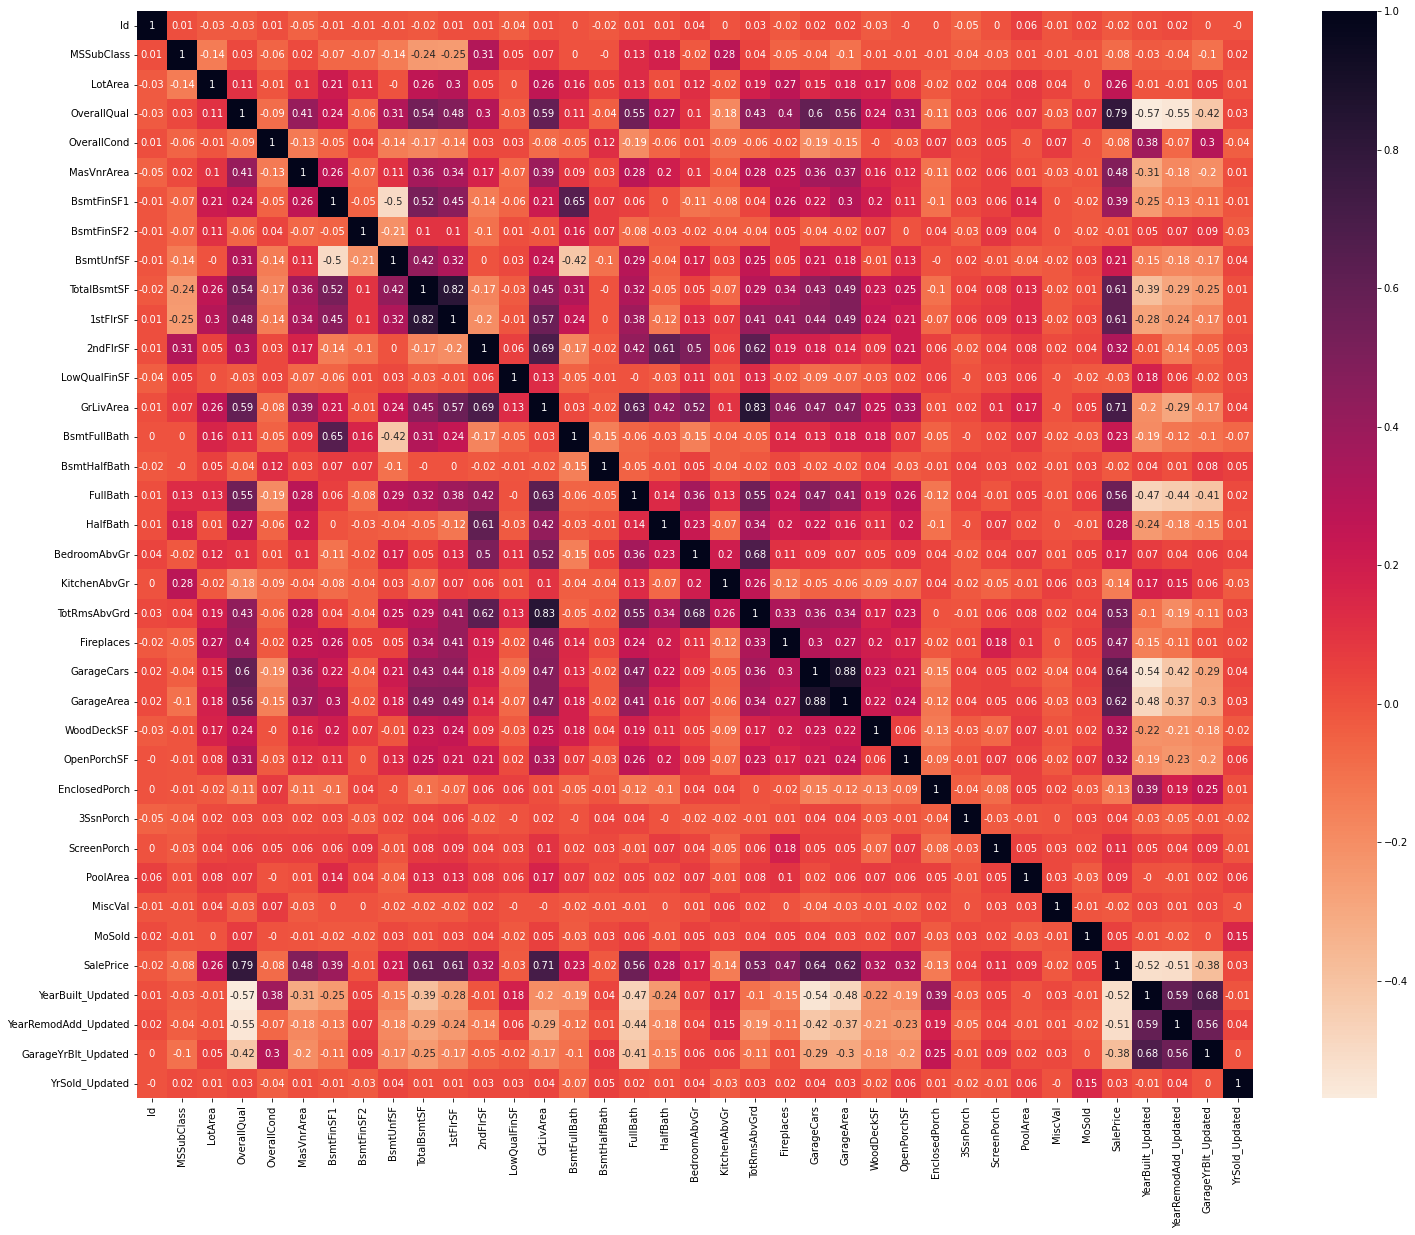

In [17]:
# find corelation and remove column which are not needed
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(num_df.corr(),2), cmap='rocket_r' , annot=True)
plt.show()

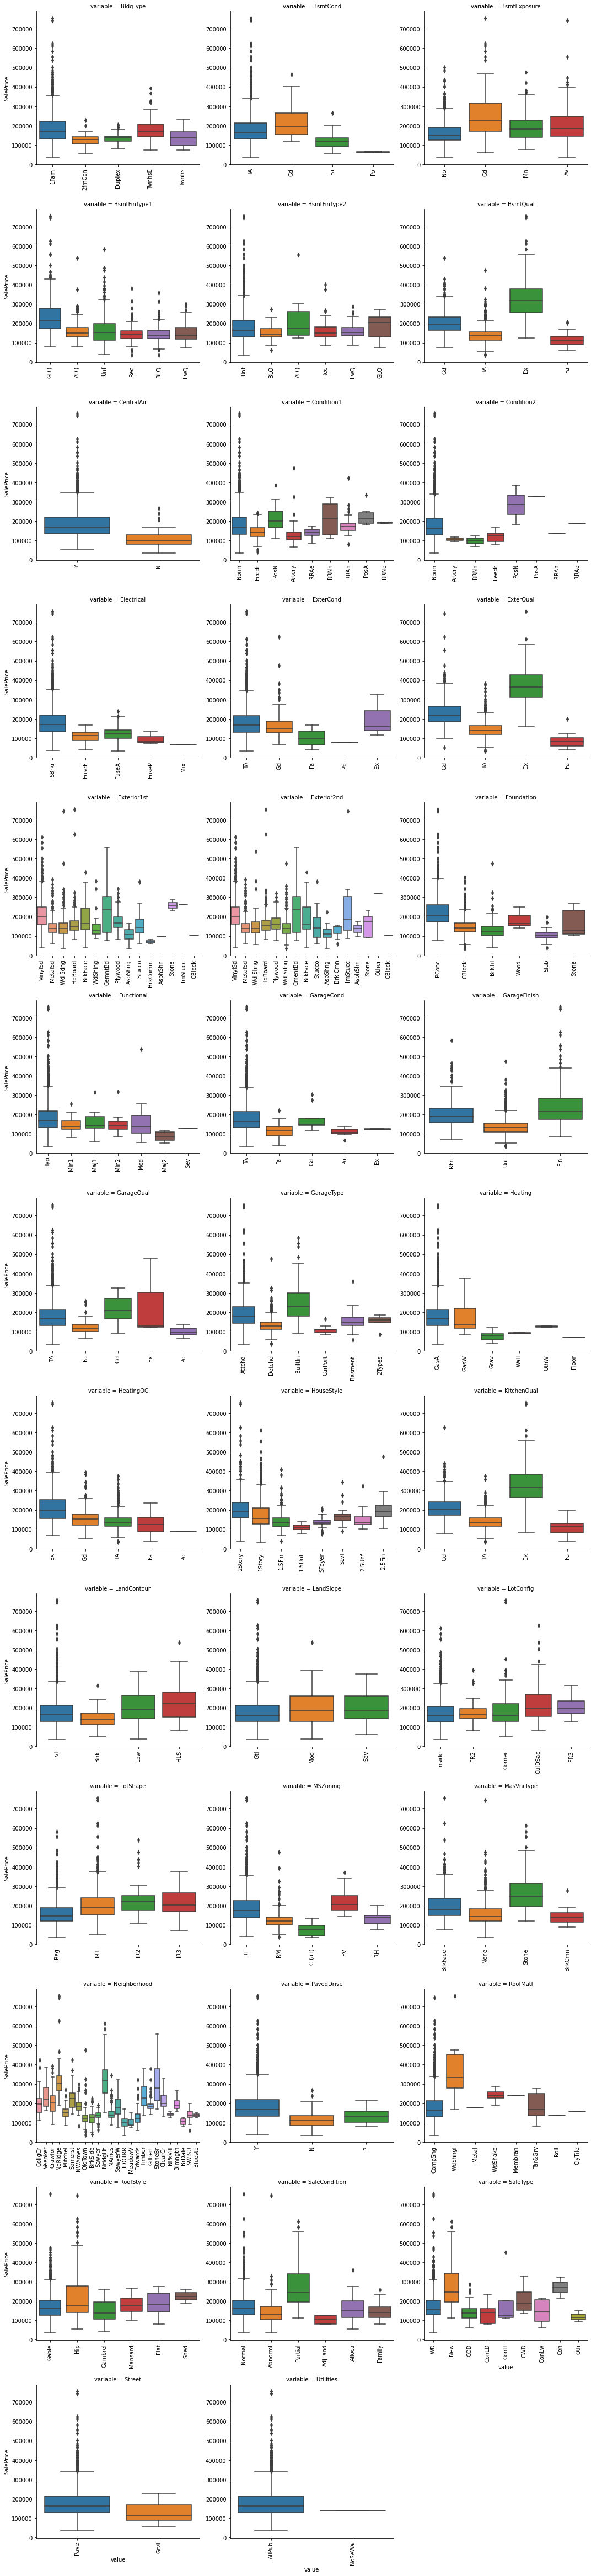

In [18]:
# Plot Categorical features with the target variable
def boxplot_func(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
cat_df = train_df[cat]
f = pd.melt(train_df, id_vars=['SalePrice'], value_vars=sorted(cat_df))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot_func, "value", "SalePrice")

In [19]:
#Observations from the above plot:-

## basement quality with good and excellent cond. are sold at higher prices.
## garages with good and excelent are sold at higher prices.
## kitchens with good quality directly impacts the price.

# Data cleaning

In [20]:
# Based on the analysis 'Street', 'Utilities' is explaining the lowest valrience hence dropping these column
# 'Id' column is not needed
train_df = train_df.drop(['Street','Utilities','Id'],axis='columns')

In [21]:
# lets remove the outliers with lower and upper quantile as 0.25 & 0.99

In [22]:
col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF','EnclosedPorch',
           '3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for cl in col:
        a = x[cl].quantile(.25)
        b = x[cl].quantile(.99)
        c = b-a
        x =  x[(x[cl] >= (a-(1.5*c))) & (x[cl] <= (b+(1.5*c)))] 
    return x   

train_df = drop_outliers(train_df)

In [23]:
# Convert ordinal values to numerical based on data dict

In [24]:
train_df['LandSlope'] = train_df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
train_df['ExterQual'] = train_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_df['BsmtQual'] = train_df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_df['BsmtCond'] = train_df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_df['BsmtExposure'] = train_df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
train_df['BsmtFinType1'] = train_df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train_df['BsmtFinType2'] = train_df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train_df['HeatingQC'] = train_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_df['CentralAir'] = train_df.CentralAir.map({'N':0,'Y':1})
train_df['KitchenQual'] = train_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_df['GarageFinish'] = train_df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
train_df['GarageQual'] = train_df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_df['GarageCond'] = train_df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_df['ExterCond'] = train_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_df['LotShape'] = train_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [25]:
# Convert columns into dummy values
dummy_col = pd.get_dummies(train_df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
                                     'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType',
                                     'Foundation','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType',
                                     'SaleCondition','MoSold']],drop_first=True)
train_df = pd.concat([train_df,dummy_col],axis='columns')
train_df = train_df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                          'RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Heating','Electrical',
                          'Functional','GarageType','PavedDrive','SaleType','SaleCondition','MoSold'],axis='columns')

# Data Preparation

# Split Train / Test

In [26]:
train_df,test_df = train_test_split(train_df,train_size=0.8,test_size=0.2,random_state=2)

In [27]:
train_df.shape,test_df.shape

((1152, 193), (289, 193))

In [28]:
# Lets Scale the data and fir the same thing on test also 

In [29]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
           '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
           '3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
train_df[num_col] = scaler.fit_transform(train_df[num_col])
test_df[num_col] = scaler.transform(test_df[num_col])

In [30]:
# take the target variable in seperate var
y_train = train_df.pop('SalePrice')
X_train = train_df
y_test = test_df.pop('SalePrice')
X_test = test_df

# RFE

In [31]:
# lets find the optimal features using RFE

In [32]:
len(X_train.columns)

192

In [33]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=80)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=80)

In [34]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [35]:
rfe_scores

,Column_Names,Status,Rank
0,MSSubClass,True,1
1,LotArea,False,23
2,LotShape,False,87
3,LandSlope,False,75
4,OverallQual,True,1
...,...,...,...
187,SaleCondition_AdjLand,False,17
188,SaleCondition_Alloca,False,19
189,SaleCondition_Family,False,105
190,SaleCondition_Normal,True,1


In [36]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [37]:
# filter train and test set based on the RFE selected columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

# Lasso regression

In [38]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8962414416832508
0.8892348033252725


# Grid Search with different values of alpha

In [39]:
folds = KFold(n_splits=10,shuffle=True,random_state=2)
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
model = Lasso()
model_1 = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=3,
                        return_train_score=True
                       )

model_1.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END ..alpha=0.001;, score=(train=0.893, test=0.909) total time=   0.0s
[CV 2/10] END ..alpha=0.001;, score=(train=0.909, test=0.753) total time=   0.0s
[CV 3/10] END ..alpha=0.001;, score=(train=0.897, test=0.879) total time=   0.0s
[CV 4/10] END ..alpha=0.001;, score=(train=0.896, test=0.890) total time=   0.0s
[CV 5/10] END ..alpha=0.001;, score=(train=0.895, test=0.905) total time=   0.0s
[CV 6/10] END ..alpha=0.001;, score=(train=0.896, test=0.880) total time=   0.0s
[CV 7/10] END ..alpha=0.001;, score=(train=0.895, test=0.905) total time=   0.0s
[CV 8/10] END ..alpha=0.001;, score=(train=0.898, test=0.868) total time=   0.0s
[CV 9/10] END ..alpha=0.001;, score=(train=0.906, test=0.528) total time=   0.0s
[CV 10/10] END .alpha=0.001;, score=(train=0.895, test=0.889) total time=   0.0s
[CV 1/10] END ...alpha=0.01;, score=(train=0.847, test=0.889) total time=   0.0s
[CV 2/10] END ...alpha=0.01;, score=(train=0.853

GridSearchCV(cv=KFold(n_splits=10, random_state=2, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=3)

In [40]:
# lets visualize the results

In [41]:
# best param
model_1.best_params_

{'alpha': 0.001}

In [42]:
result_l = pd.DataFrame(model_1.cv_results_)
result_l['param_alpha'] = result_l['param_alpha'].astype('float32')

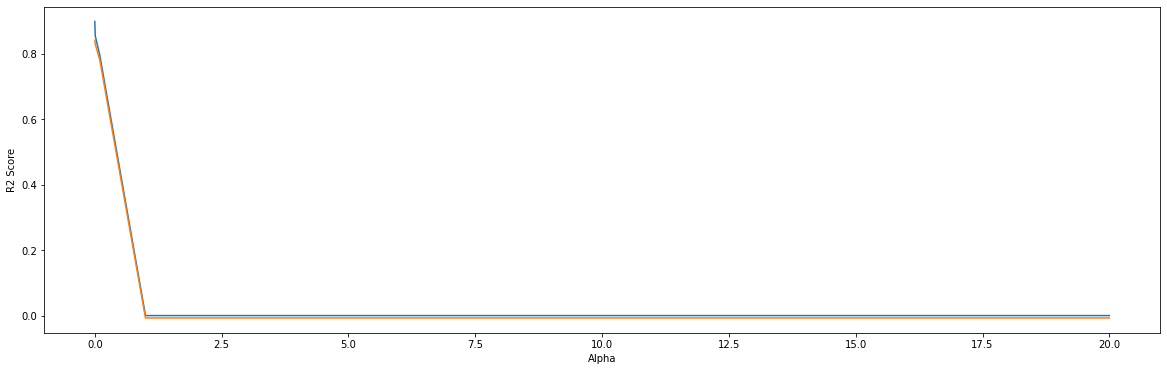

In [43]:
plt.figure(figsize=(20,6))
plt.plot(result_l['param_alpha'],result_l['mean_train_score'])
plt.plot(result_l['param_alpha'],result_l['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [44]:
# model with best param
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8962414416832508
0.8892348033252725


In [45]:
# best features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = train_df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [46]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
45,YearBuilt_Updated,0.555471
30,KitchenQual,0.512864
28,BedroomAbvGr,0.401170
78,Neighborhood_Sawyer,0.385873
14,BsmtFinType2,0.370103
27,HalfBath,0.359513
23,GrLivArea,0.218707
69,Neighborhood_MeadowV,0.191489
2,LotShape,0.188181
38,WoodDeckSF,0.182314


# Ridge Regression

# Grid Search with different values of Ridge

In [47]:
folds  = KFold(n_splits=10,shuffle=True,random_state=2)
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
model = Ridge()
model_2 = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=3,
                        return_train_score=True)
model_2.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END ..alpha=0.001;, score=(train=0.901, test=0.909) total time=   0.0s
[CV 2/10] END ..alpha=0.001;, score=(train=0.918, test=0.669) total time=   0.0s
[CV 3/10] END ..alpha=0.001;, score=(train=0.904, test=0.886) total time=   0.0s
[CV 4/10] END ..alpha=0.001;, score=(train=0.905, test=0.878) total time=   0.0s
[CV 5/10] END ..alpha=0.001;, score=(train=0.902, test=0.909) total time=   0.0s
[CV 6/10] END ..alpha=0.001;, score=(train=0.904, test=0.887) total time=   0.0s
[CV 7/10] END ..alpha=0.001;, score=(train=0.902, test=0.908) total time=   0.0s
[CV 8/10] END ..alpha=0.001;, score=(train=0.906, test=0.868) total time=   0.0s
[CV 9/10] END ..alpha=0.001;, score=(train=0.914, test=0.605) total time=   0.0s
[CV 10/10] END .alpha=0.001;, score=(train=0.903, test=0.901) total time=   0.0s
[CV 1/10] END ...alpha=0.01;, score=(train=0.901, test=0.909) total time=   0.0s
[CV 2/10] END ...alpha=0.01;, score=(train=0.918

GridSearchCV(cv=KFold(n_splits=10, random_state=2, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=3)

In [48]:
# best param
model_2.best_params_

{'alpha': 1.0}

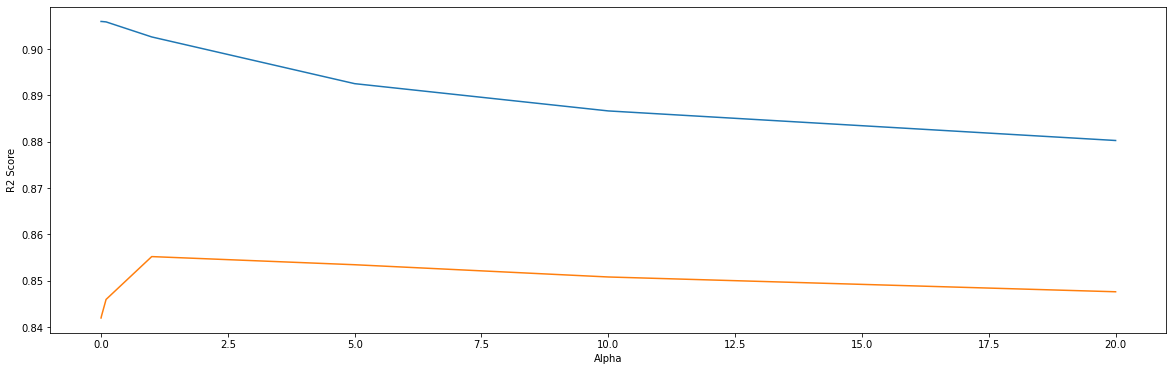

In [49]:
result_2 = pd.DataFrame(model_2.cv_results_)
result_2['param_alpha'] = result_2['param_alpha'].astype('float32')
plt.figure(figsize=(20,6))
plt.plot(result_2['param_alpha'],result_2['mean_train_score'])
plt.plot(result_2['param_alpha'],result_2['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [50]:
# as our best fit was approx 1.0 alpha, lets do grid search again to drill down better alpha for ridge

In [51]:
folds  = KFold(n_splits=10,shuffle=True,random_state=2)
hyper_param = {'alpha':[0.8,0.85,0.9,0.95,1.0,1.2,1.5,1.55,1.6,1.7]}
model = Ridge()
model_2 = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=3,
                        return_train_score=True)
model_2.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ....alpha=0.8;, score=(train=0.899, test=0.910) total time=   0.0s
[CV 2/10] END ....alpha=0.8;, score=(train=0.911, test=0.812) total time=   0.0s
[CV 3/10] END ....alpha=0.8;, score=(train=0.902, test=0.887) total time=   0.0s
[CV 4/10] END ....alpha=0.8;, score=(train=0.902, test=0.890) total time=   0.0s
[CV 5/10] END ....alpha=0.8;, score=(train=0.900, test=0.910) total time=   0.0s
[CV 6/10] END ....alpha=0.8;, score=(train=0.902, test=0.886) total time=   0.0s
[CV 7/10] END ....alpha=0.8;, score=(train=0.900, test=0.907) total time=   0.0s
[CV 8/10] END ....alpha=0.8;, score=(train=0.904, test=0.872) total time=   0.0s
[CV 9/10] END ....alpha=0.8;, score=(train=0.913, test=0.574) total time=   0.0s
[CV 10/10] END ...alpha=0.8;, score=(train=0.901, test=0.898) total time=   0.0s
[CV 1/10] END ...alpha=0.85;, score=(train=0.899, test=0.910) total time=   0.0s
[CV 2/10] END ...alpha=0.85;, score=(train=0.9

GridSearchCV(cv=KFold(n_splits=10, random_state=2, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.8, 0.85, 0.9, 0.95, 1.0, 1.2, 1.5, 1.55,
                                   1.6, 1.7]},
             return_train_score=True, scoring='r2', verbose=3)

In [52]:
# best param
model_2.best_params_

{'alpha': 1.55}

In [53]:
result_2 = pd.DataFrame(model_2.cv_results_)
result_2['param_alpha'] = result_2['param_alpha'].astype('float32')

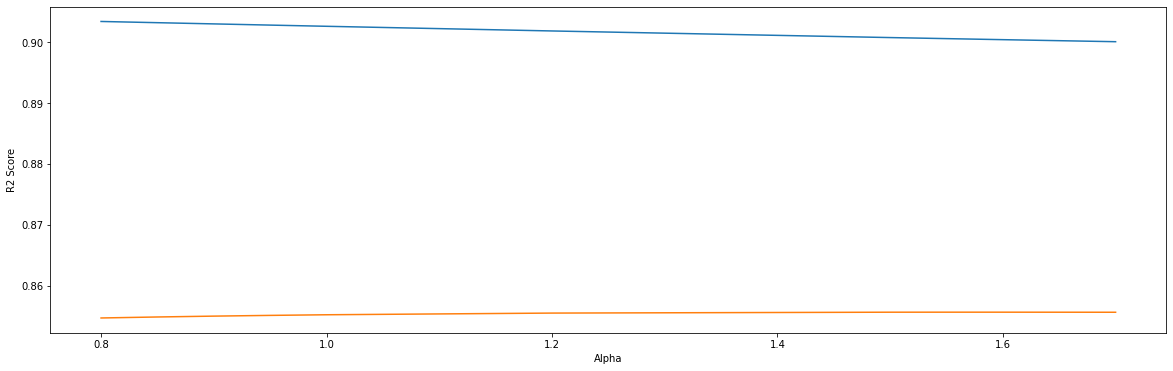

In [54]:
plt.figure(figsize=(20,6))
plt.plot(result_2['param_alpha'],result_2['mean_train_score'])
plt.plot(result_2['param_alpha'],result_2['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [55]:
# model with best param
ridge = Ridge(alpha = 1.55)
ridge.fit(X_train,y_train)
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))
y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8994691789677604
0.8804634646245046


In [56]:
# best features
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = train_df.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [57]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
45,YearBuilt_Updated,0.622993
30,KitchenQual,0.570810
28,BedroomAbvGr,0.437022
27,HalfBath,0.397470
78,Neighborhood_Sawyer,0.372305
16,BsmtUnfSF,0.323408
35,GarageArea,0.301067
69,Neighborhood_MeadowV,0.275385
49,MSZoning_FV,0.271276
38,WoodDeckSF,0.254848


# Conclusion

In [58]:
# Both model Ridge and Lasso gives very good results
# we can see that the r2_scores are almost same for both the model but as we know lasso will penalize more and help
# in feature elimination also, so my go to model will be that only.

## Top 10 features given by lasso and ridge are as follows

In [59]:
print(lasso_coef.sort_values(by='Coef',ascending=False).head(10)["Feature"])
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10)["Feature"])

45       YearBuilt_Updated
30             KitchenQual
28            BedroomAbvGr
78     Neighborhood_Sawyer
14            BsmtFinType2
27                HalfBath
23               GrLivArea
69    Neighborhood_MeadowV
2                 LotShape
38              WoodDeckSF
Name: Feature, dtype: object
45       YearBuilt_Updated
30             KitchenQual
28            BedroomAbvGr
27                HalfBath
78     Neighborhood_Sawyer
16               BsmtUnfSF
35              GarageArea
69    Neighborhood_MeadowV
49             MSZoning_FV
38              WoodDeckSF
Name: Feature, dtype: object


## Best alpha value for Lasso and ridge

In [60]:
model_1.best_params_,model_2.best_params_

({'alpha': 0.001}, {'alpha': 1.55})

In [61]:
# R2 reamins same for both best models which is approx 0.89 for train and 0.88 for test

# Experiment for Subjective Questions

## Double the value of alpha for lasso and ridge

In [62]:
#Lasso
lasso = Lasso(alpha=0.001*2)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8896932232189305
0.88893831591186


In [63]:
# best features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = train_df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
30,KitchenQual,0.443736
14,BsmtFinType2,0.367227
78,Neighborhood_Sawyer,0.360468
28,BedroomAbvGr,0.351406
27,HalfBath,0.315973
45,YearBuilt_Updated,0.308491
2,LotShape,0.195525
23,GrLivArea,0.187727
69,Neighborhood_MeadowV,0.172243
20,1stFlrSF,0.142357


In [64]:
# Ridge
ridge = Ridge(alpha = 1.55*2)
ridge.fit(X_train,y_train)
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))
y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8954212295566406
0.8834824002705689


In [65]:
# best features
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = train_df.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
30,KitchenQual,0.521498
45,YearBuilt_Updated,0.501936
28,BedroomAbvGr,0.407814
27,HalfBath,0.377407
78,Neighborhood_Sawyer,0.356680
16,BsmtUnfSF,0.251057
69,Neighborhood_MeadowV,0.249619
23,GrLivArea,0.225322
38,WoodDeckSF,0.224817
14,BsmtFinType2,0.210702
